In [0]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [0]:
df= spark.read.csv("/FileStore/tables/bank.csv", header=True, inferSchema=True)
df.printSchema()

root
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- day: integer (nullable = true)
-- month: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- deposit: string (nullable = true)

In [0]:
df.head(5)
df.select('age','balance','deposit').show(5)
df.groupBy("age").count().sort("count",ascending=True).show()
df.describe().show()
df.describe('balance').show()
df.filter(df.age > 40).count()
df.groupby('marital').agg({'balance':'mean'}).show()


+---+-------+-------+
age|balance|deposit|
+---+-------+-------+
 59| 2343| yes|
 56| 45| yes|
 41| 1270| yes|
 55| 2476| yes|
 54| 184| yes|
+---+-------+-------+
only showing top 5 rows

+---+-----+
age|count|
+---+-----+
 95| 1|
 89| 1|
 88| 2|
 92| 2|
 93| 2|
 90| 2|
 87| 4|
 84| 5|
 86| 5|
 85| 5|
 83| 7|
 18| 8|
 81| 9|
 82| 10|
 79| 10|
 19| 13|
 80| 17|
 75| 18|
 74| 18|
 78| 19|
+---+-----+
only showing top 20 rows

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
summary| age| job| marital|education|default| balance|housing| loan| contact| day|month| duration| campaign| pdays| previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
 count| 11162| 11162| 11162| 11162| 11162| 11162| 11162|11162| 11162| 11162|11162| 11162| 11162| 11162| 11162| 11162| 11162|
 mean|41.231947679627304| null| null| null| null|1528.5385235620856| null| null| null|15.658036194230425| null|371.99381831213043| 2.508421429851281| 51.33040673714388|0.8325568894463358| null| null|
 stddev|11.913369192215518| null| null| null| null| 3225.413325946149| null| null| null| 8.420739541006462| null|347.12838571630687|2.7220771816614824|108.75828197197717| 2.292007218670508| null| null|
 min| 18| admin.|divorced| primary| no| -6847| no| no|cellular| 1| apr| 2| 1| -1| 0| failure| no|
 max| 95|unknown| single| unknown| yes| 81204| yes| yes| unknown| 31| sep| 3881| 63| 854| 58| unknown| yes|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+

+-------+------------------+
summary| balance|
+-------+------------------+
 count| 11162|
 mean|1528.5385235620856|
 stddev| 3225.413325946149|
 min| -6847|
 max| 81204|
+-------+------------------+

+--------+------------------+
 marital| avg(balance)|
+--------+------------------+
divorced|1371.8352668213456|
 married|1599.9275704613447|
 single|1457.2552586696986|
+--------+------------------+

In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [0]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


In [0]:
categoricalColumns = ['job','marital','education','default','housing','loan','contact','poutcome']
stages = []
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol= categoricalCol,outputCol=categoricalCol + 'Index')
  encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()],outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer (inputCol='deposit',outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age','balance','duration','campaign','pdays','previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols 
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol = "features")
stages += [assembler]

In [0]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
df.printSchema()

root
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- day: integer (nullable = true)
-- month: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- deposit: string (nullable = true)
-- jobIndex: double (nullable = false)
-- jobclassVec: vector (nullable = true)
-- maritalIndex: double (nullable = false)
-- maritalclassVec: vector (nullable = true)
-- educationIndex: double (nullable = false)
-- educationclassVec: vector (nullable = true)
-- defaultIndex: double (nullable = false)
-- defaultclassVec: vector (nullable = true)
-- housingIndex: double (nullable = false)
-- housingclassVec: vector (nullable = true)
-- loanIndex: double (nullable = false)
-- loanclassVec: vector (nullable = true)
-- contactIndex: double (nullable = false)
-- contactclassVec: vector (nullable = true)
-- poutcomeIndex: double (nullable = false)
-- poutcomeclassVec: vector (nullable = true)
-- label: double (nullable = false)
-- features: vector (nullable = true)

In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [0]:
train, test = df.randomSplit([0.8,0.2],seed = 99999)
from pyspark.ml.clustering import KMeans
import numpy as np
cost = np.zeros(10)
for k in range(2,10):
  kmeans = KMeans().setK(k).setSeed(1)
  model = kmeans.fit(train)
  cost[k] = model.computeCost(train)

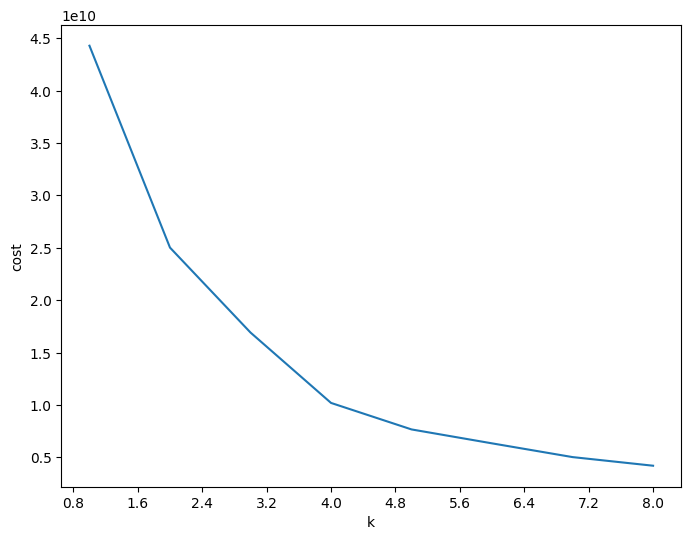

In [0]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(range(1,9),cost[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(interger=True))
display(fig)

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans().setK(8).setSeed(999)
model = kmeans.fit(train)

In [0]:
evaluator = ClusteringEvaluator()
predictions = model.transform(train)
silhouette = evaluator.evaluate(predictions)
print("Training Dataset Performance = " + str(silhouette))

Training Dataset Performance = 0.7363543157476975

In [0]:
centers = model.clusterCenters()
print("Cluster Centers : ")
for center in centers:
  print(center)

Cluster Centers : 
[2.08811932e-01 1.89610835e-01 1.63723641e-01 1.31836105e-01
 8.96622664e-02 5.55460312e-02 3.48019887e-02 3.25732899e-02
 3.24018515e-02 2.98302760e-02 2.50300017e-02 5.46374079e-01
 3.28990228e-01 5.17229556e-01 3.03960226e-01 1.34579119e-01
 9.77884451e-01 4.94771130e-01 8.41248071e-01 7.18155323e-01
 2.25441454e-01 7.67529573e-01 1.06806103e-01 8.31476084e-02
 4.01242928e+01 2.86513972e+02 3.65381279e+02 2.56197497e+00
 4.94575690e+01 7.32041831e-01]
[3.18681319e-01 9.89010989e-02 2.30769231e-01 7.69230769e-02
 2.19780220e-02 9.89010989e-02 5.49450549e-02 1.09890110e-02
 2.19780220e-02 3.29670330e-02 1.09890110e-02 5.05494505e-01
 4.06593407e-01 3.73626374e-01 5.38461538e-01 5.49450549e-02
 1.00000000e+00 5.93406593e-01 9.78021978e-01 8.02197802e-01
 9.89010989e-02 7.14285714e-01 8.79120879e-02 1.31868132e-01
 4.10879121e+01 1.48263516e+04 4.36164835e+02 2.42857143e+00
 5.56813187e+01 9.01098901e-01]
[3.01694915e-01 9.15254237e-02 1.96610169e-01 9.15254237e-02
 5.42372881e-02 9.15254237e-02 4.06779661e-02 3.38983051e-02
 4.06779661e-02 2.03389831e-02 2.71186441e-02 6.03389831e-01
 3.01694915e-01 3.45762712e-01 4.50847458e-01 1.55932203e-01
 1.00000000e+00 6.71186441e-01 9.45762712e-01 7.32203390e-01
 1.76271186e-01 7.08474576e-01 1.15254237e-01 1.25423729e-01
 4.46000000e+01 8.42467797e+03 3.81294915e+02 2.57966102e+00
 5.61593220e+01 9.01694915e-01]
[2.61813538e-01 1.41762452e-01 1.59642401e-01 9.83397190e-02
 6.64112388e-02 1.12388250e-01 4.34227331e-02 3.32056194e-02
 2.42656450e-02 2.68199234e-02 2.68199234e-02 5.92592593e-01
 2.83524904e-01 4.24010217e-01 3.86973180e-01 1.37931034e-01
 9.98722861e-01 5.65772669e-01 9.32311622e-01 7.12643678e-01
 1.95402299e-01 7.15197957e-01 1.09833972e-01 1.27713921e-01
 4.41315453e+01 4.40467816e+03 4.09340996e+02 2.31162197e+00
 5.00498084e+01 9.88505747e-01]
[4.66666667e-01 6.66666667e-02 1.66666667e-01 3.33333333e-02
 3.33333333e-02 1.33333333e-01 0.00000000e+00 3.33333333e-02
 0.00000000e+00 3.33333333e-02 3.33333333e-02 7.33333333e-01
 2.66666667e-01 2.66666667e-01 6.00000000e-01 1.00000000e-01
 1.00000000e+00 7.66666667e-01 9.33333333e-01 8.00000000e-01
 1.00000000e-01 8.00000000e-01 6.66666667e-02 6.66666667e-02
 4.57333333e+01 2.68458333e+04 3.31533333e+02 3.33333333e+00
 2.98000000e+01 7.66666667e-01]
[2.46137453e-01 1.53969100e-01 1.58231220e-01 9.74960043e-02
 8.31113479e-02 9.16355887e-02 4.04901438e-02 3.24986681e-02
 3.51624933e-02 2.61054875e-02 2.66382525e-02 6.10548748e-01
 2.91955248e-01 4.71497070e-01 3.54821524e-01 1.24134257e-01
 9.97336175e-01 5.70591369e-01 9.10495471e-01 7.29355354e-01
 1.81140117e-01 6.87799680e-01 1.30527437e-01 1.21470432e-01
 4.27277571e+01 1.92545285e+03 3.87397443e+02 2.38252531e+00
 6.07187001e+01 1.03835908e+00]
[0.00000000e+00 0.00000000e+00 3.33333333e-01 3.33333333e-01
 0.00000000e+00 0.00000000e+00 3.33333333e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.66666667e-01 3.33333333e-01 3.33333333e-01 0.00000000e+00
 1.00000000e+00 6.66666667e-01 1.00000000e+00 3.33333333e-01
 6.66666667e-01 6.66666667e-01 0.00000000e+00 3.33333333e-01
 4.76666667e+01 5.15553333e+04 7.53333333e+02 1.66666667e+00
 6.23333333e+01 3.33333333e-01]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 5.0000e-01
 8.4000e+01 8.1204e+04 5.3450e+02 1.0000e+00 2.0350e+02 2.5000e+00]

In [0]:
kmeans = KMeans().setK(8).setSeed(999)
model = kmeans.fit(test)

In [0]:
evaluator = ClusteringEvaluator()
predictions = model.transform(test)
silhouette = evaluator.evaluate(predictions)
print("Testing Dataset Performance= "+ str(silhouette))

Testing Dataset Performance= 0.7446001569802811

In [0]:
#Training Dataset
cluster=[3,4,5,8]
train_performance=[]
for i in cluster:
  kmeans = KMeans().setK(i).setSeed(999)
  model = kmeans.fit(train)
  evaluator = ClusteringEvaluator()
  predictions = model.transform(train)
  silhouette = evaluator.evaluate(predictions)
  train_performance.append(silhouette)
  print("Training Dataset Performance for K-mean with "+str(i)+"Cluster = " + str(silhouette))

Training Dataset Performance for K-mean with 3Cluster = 0.879399553497968
Training Dataset Performance for K-mean with 4Cluster = 0.8651895328329998
Training Dataset Performance for K-mean with 5Cluster = 0.8208494545136753
Training Dataset Performance for K-mean with 8Cluster = 0.7363543157476975

In [0]:
#test Dataset
cluster=[3,4,5,8]
train_performance=[]
for i in cluster:
  kmeans = KMeans().setK(i).setSeed(999)
  model = kmeans.fit(train)
  evaluator = ClusteringEvaluator()
  predictions = model.transform(test)
  silhouette = evaluator.evaluate(predictions)
  train_performance.append(silhouette)
  print("Training Dataset Performance for K-mean with "+str(i)+"Cluster = " + str(silhouette))

Training Dataset Performance for K-mean with 3Cluster = 0.8816599450996049
Training Dataset Performance for K-mean with 4Cluster = 0.8690850392233181
Training Dataset Performance for K-mean with 5Cluster = 0.8328806996735177
Training Dataset Performance for K-mean with 8Cluster = 0.7446001569802811